In [1]:
!which python

/Users/ahmadabdullahtariq/Documents/Projects/Thesis/.venv/bin/python


# Group Hotel Data Preperation

In [39]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook

mpl.rcParams['figure.figsize'] = (30, 15)
mpl.rcParams['axes.grid'] = False

In [23]:
# hotels with decent amount of data
clean_hotels = [  48,   80,   86,  148,  151,  199,  269,  284,  317,  322,  577,  1041, 1100, 1479, 1968, 4290]

df = pd.DataFrame()
for hotelId in tqdm_notebook(clean_hotels):
    dx = pd.read_pickle('../dataset/preprocessed/'+str(hotelId)+'_imputed.pkl')
    dx['HotelId'] = str(hotelId)
    df = df.append(dx, ignore_index=True)

In [24]:
df.head()

,DOA,DBA,LAR,ADR,Rooms,ROH,HotelId
0,2018-01-01,89.0,39.6,39.6,43.0,37.0,48
1,2018-01-01,88.0,39.6,39.6,43.0,35.0,48
2,2018-01-01,87.0,39.6,40.5,43.0,34.0,48
3,2018-01-01,86.0,39.6,40.5,43.0,33.0,48
4,2018-01-01,85.0,48.6,48.6,43.0,33.0,48


In [25]:
def average_attr(dx,col):
    # create unique col for pivot combining target date and date of arrival
    dx['DOA-DBA'] = dx['DOA'].astype('str')+'|'+dx['DBA'].astype('str')
    dx = dx.pivot(index='DOA-DBA',columns='HotelId',values=col)
    # calculate mean, std, avg, min and max for given attribute
    dx['max'] = dx.max(axis=1)
    dx['min'] = dx.min(axis=1)
    dx['med'] = dx.median(axis=1)
    dx['avg'] = dx.mean(axis=1)
    dx['std'] = dx.std(axis=1)
    dx = dx.reset_index()
    # filter discriptive attributes only
    dx[[0,1]] = dx['DOA-DBA'].str.rsplit("|", expand=True)
    dx = dx[[0,1,'max','min','med','avg','std']].rename(columns={0:'DOA',1:'DBA','max':col+'_max','min':col+'_min','med':col+'_med','avg':col+'_avg','std':col+'_std'})
    dx['DOA'] = pd.to_datetime(dx['DOA'])
    dx['DOW'] = dx['DOA'].dt.dayofweek
    dx['DBA'] = dx['DBA'].astype('float')
    return dx

In [26]:
avg_occ = average_attr(df,'ROH')
avg_LAR = average_attr(df,'LAR')

In [27]:
df = pd.merge(avg_occ, avg_LAR, left_on=['DOA','DBA','DOW'], right_on=['DOA','DBA','DOW'], how='outer')

In [28]:
df.head(10)

HotelId,DOA,DBA,ROH_max,ROH_min,ROH_med,ROH_avg,ROH_std,DOW,LAR_max,LAR_min,LAR_med,LAR_avg,LAR_std
0,2018-01-01,0.0,194.0,1.0,19.5,45.710526,65.541332,0,144.5,38.69,72.9,75.847778,30.871318
1,2018-01-01,1.0,194.0,1.0,25.0,47.368421,64.749892,0,144.5,38.69,72.9,75.847778,30.871318
2,2018-01-01,10.0,203.0,2.0,21.0,47.842105,67.742751,0,144.5,38.69,72.9,75.847778,30.871318
3,2018-01-01,11.0,203.0,3.0,22.0,48.368421,67.552872,0,144.5,38.69,72.9,75.847778,30.871318
4,2018-01-01,12.0,217.0,3.0,22.0,49.842105,70.976099,0,144.5,38.69,72.9,75.847778,30.871318
5,2018-01-01,13.0,216.0,3.0,22.0,49.736842,70.728422,0,144.5,38.69,72.9,75.847778,30.871318
6,2018-01-01,14.0,216.0,3.0,22.5,50.447368,70.561077,0,144.5,38.69,72.9,75.847778,30.871318
7,2018-01-01,15.0,216.0,3.0,22.5,50.657895,70.487037,0,144.5,38.69,72.9,75.847778,30.871318
8,2018-01-01,16.0,216.0,6.0,23.0,51.526316,70.002533,0,144.5,38.69,72.9,75.847778,30.871318
9,2018-01-01,17.0,216.0,6.0,23.0,51.526316,70.002533,0,144.5,38.69,72.9,75.847778,30.871318


In [29]:
df.to_pickle('../dataset/preprocessed/group_imputed.pkl')

In [30]:
df = pd.read_pickle('../dataset/preprocessed/group_imputed.pkl')

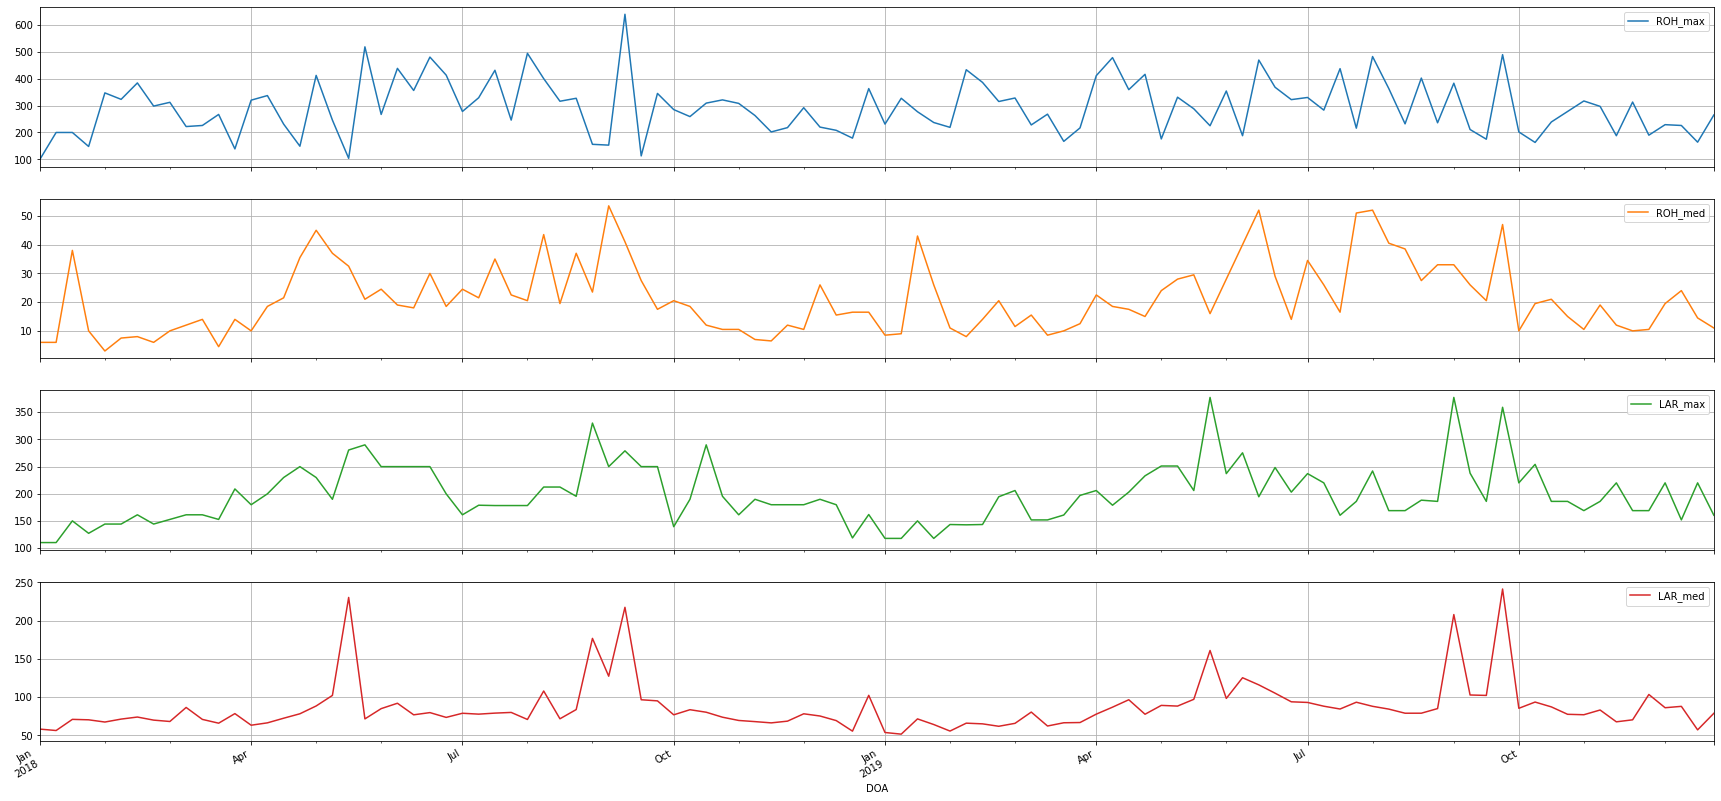

In [40]:
plot_cols = ['DOA','ROH_max','ROH_med','LAR_max','LAR_med']
plot_features = df[(df.DBA==0)&(df.DOW==5)][plot_cols].set_index('DOA')
_ = plot_features.plot(subplots=True,grid=True)

In [10]:
# df['DBA'].astype('float')
df.dtypes

HotelId
DOA        datetime64[ns]
DBA               float64
ROH_max           float64
ROH_min           float64
ROH_med           float64
ROH_avg           float64
ROH_std           float64
LAR_max           float64
LAR_min           float64
LAR_med           float64
LAR_avg           float64
LAR_std           float64
dtype: object